In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

dataset https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [27]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
df.isnull().sum() # print the sum of null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Since there is no ‘Null’ value, therefore we need not to drop anything.

Next, our aim is to find the buying-patterns of the customers, therefore we do not need the columns ‘Channel’ and ‘Region’ for this analysis. Hence we will drop these two columns

In [29]:
df = df.drop(labels=['Channel', 'Region'], axis=1)

In [30]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Clustering using KMean

In [31]:
#preprocessing
T = preprocessing.Normalizer().fit_transform(df)

In [32]:
T

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [48]:
#number of clusters
n_clusters = 6
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit_predict(T)

array([4, 2, 2, 5, 1, 4, 4, 2, 4, 0, 0, 1, 4, 4, 4, 1, 0, 4, 4, 4, 1, 5,
       1, 2, 4, 4, 1, 1, 0, 1, 4, 2, 1, 1, 2, 0, 1, 4, 0, 1, 5, 1, 2, 0,
       2, 0, 0, 2, 4, 0, 5, 2, 1, 0, 1, 2, 0, 0, 1, 2, 4, 2, 2, 2, 5, 0,
       0, 4, 3, 1, 5, 4, 3, 5, 2, 1, 3, 0, 1, 2, 1, 0, 2, 1, 4, 0, 2, 1,
       3, 1, 1, 5, 0, 3, 0, 0, 0, 3, 3, 5, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 5, 1, 1, 1, 1, 4, 1, 5, 1, 5, 1, 2, 1, 1, 5, 4, 0, 1, 5, 1,
       1, 1, 1, 1, 2, 0, 4, 4, 4, 1, 1, 5, 1, 2, 1, 4, 5, 1, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 5, 0, 0, 0, 0, 2, 0,
       1, 4, 4, 3, 4, 1, 0, 3, 0, 5, 3, 2, 2, 0, 5, 1, 4, 0, 1, 5, 5, 0,
       4, 1, 0, 0, 4, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 5,
       1, 0, 3, 3, 1, 1, 4, 5, 2, 5, 5, 2, 1, 0, 1, 2, 1, 1, 1, 1, 5, 1,
       1, 4, 2, 0, 1, 1, 1, 5, 5, 0, 3, 4, 2, 1, 4, 5, 1, 1, 4, 5, 1, 2,
       0, 2, 0, 1, 2, 1, 3, 2, 0, 1, 2, 3, 1, 3, 5, 4, 4, 4, 1, 5, 1, 1,
       1, 5, 1, 1, 2, 4, 2, 0, 1, 4, 1, 4, 2, 0, 4,

In [49]:
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_

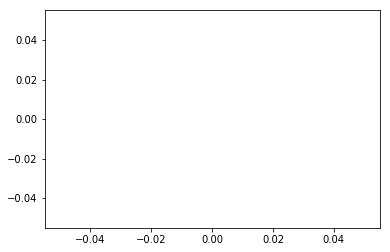

In [45]:
#Visualising the clusters
plt.scatter(T[kmean_model == 0, 0], T[kmean_model == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(T[kmean_model == 1, 0], T[kmean_model == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(T[kmean_model == 2, 0], T[kmean_model == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

In [46]:
kmean_model == 0, 1

(False, 1)

In [47]:
T[kmean_model == 0, 1]

array([], shape=(0, 2), dtype=float64)